In [66]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import string
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

y=pd.read_csv(r'/Users/jyothsnaakula/Documents/6040/Data/Reviews.csv')
y

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


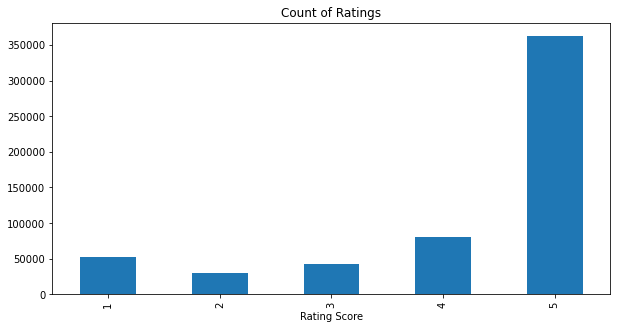

In [67]:
ax = y['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Ratings',
          figsize=(10, 5))
ax.set_xlabel('Rating Score')
plt.show()

Rid Of Very Unhelpful Reviews & Narrow It To First 5000 Due To Data Size

In [68]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 15000)]
train_set

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...
14994,14995,B000EGZ99M,AMP2OWAY2BN0Z,Bonnie Suttle,1,1,4,1282694400,RiceSelect Orzo Whole Wheat Pasta,I've been using the product in dishes that cal...
14995,14996,B000EGZ99M,AH720G9X1MIQ8,KJT,1,1,5,1255824000,Rice Select Whole Wheat Orzo,Could no longer find Rice Select Whole Wheat O...
14996,14997,B000EGZ99M,A1MW2HEG4LF56B,S. Mariconda,3,4,5,1170633600,Absolutely wonderful comfort food!,I discovered this in our local QFC grocery sto...
14997,14998,B000EGZ99M,A1GY0FE07QFFLF,Arlington Cory,0,0,5,1326585600,Whole Wheat Orzo Tasty and Versatile,"Hard to find whole wheat orzo in supermarket, ..."


In [16]:
train_set.shape

(12734, 10)

In [17]:
train_set

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...
14994,14995,B000EGZ99M,AMP2OWAY2BN0Z,Bonnie Suttle,1,1,4,1282694400,RiceSelect Orzo Whole Wheat Pasta,I've been using the product in dishes that cal...
14995,14996,B000EGZ99M,AH720G9X1MIQ8,KJT,1,1,5,1255824000,Rice Select Whole Wheat Orzo,Could no longer find Rice Select Whole Wheat O...
14996,14997,B000EGZ99M,A1MW2HEG4LF56B,S. Mariconda,3,4,5,1170633600,Absolutely wonderful comfort food!,I discovered this in our local QFC grocery sto...
14997,14998,B000EGZ99M,A1GY0FE07QFFLF,Arlington Cory,0,0,5,1326585600,Whole Wheat Orzo Tasty and Versatile,"Hard to find whole wheat orzo in supermarket, ..."


Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [77]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyothsnaakula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jyothsnaakula/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jyothsnaakula/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
data_nouns

,Text
0,Vitality food products quality product stew me...
2,confection centuries citrus gelatin nuts case ...
4,Great taffy price assortment yummy taffy Deliv...
5,hair taffy pound bag taffy flavors watermelon ...
6,saltwater taffy flavors candy None candies ver...
...,...
14994,product dishes rice mix daughter receipe recip...
14995,Rice Select Whole Wheat Orzo grocery store Ama...
14996,QFC grocery store place Amazon price package. ...
14997,Hard wheat orzo supermarket Amazon Tasty soup ...


Loop to strip out nouns

In [44]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [46]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))
data_nouns

,Text
0,Vitality food products quality product stew me...
2,confection centuries citrus gelatin nuts case ...
4,Great taffy price assortment yummy taffy Deliv...
5,hair taffy pound bag taffy flavors watermelon ...
6,saltwater taffy flavors candy None candies ver...
...,...
14994,product dishes rice mix daughter receipe recip...
14995,Rice Select Whole Wheat Orzo grocery store Ama...
14996,QFC grocery store place Amazon price package. ...
14997,Hard wheat orzo supermarket Amazon Tasty soup ...


Add Stop Words to remove words that aren't useful to analysis but common

In [47]:

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [78]:
# Lemmatizing text
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    li =[]
    for i in text.split():
        li.append(lemmatizer.lemmatize(i.lower()))
    return ' '.join(li)


In [79]:
data_nouns['Cleaned'] = data_nouns['Text'].apply(lemmatize)

In [80]:
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

def lemmatize(text):
    li =[]
    for i in text.split():
        li.append(lemmatizer.lemmatize(i.lower()))
    return ' '.join(li)

In [81]:
data_nouns['Cleaned'] = data_nouns['Text'].apply(lemmatize)

In [82]:
# Removing all the numbers
def number_remove(text):
    
    return ' '.join([i for i in text.split() if not i.isdigit()])

In [83]:
data_nouns['Cleaned'] = data_nouns['Cleaned'].apply(number_remove)

In [90]:
data_nouns['Cleaned']

0        vitality food product quality product stew mea...
2        confection century citrus gelatin nut case fil...
4        great taffy price assortment yummy taffy deliv...
5        hair taffy pound bag taffy flavor watermelon r...
6        saltwater taffy flavor candy none candy versio...
                               ...                        
14994    product dish rice mix daughter receipe recipe ...
14995    rice select whole wheat orzo grocery store ama...
14996    qfc grocery store place amazon price package. ...
14997    hard wheat orzo supermarket amazon tasty soup ...
14998         product orzo packaging jar storage measuring
Name: Cleaned, Length: 12734, dtype: object

Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [84]:
# Creating bag of words using count vectorizer
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index

In [85]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis

In [91]:
vectorizer = CountVectorizer(      
                             min_df=10,                       
                             stop_words= stop_words,             
                             lowercase=True, 
                             ngram_range=(1,3),         
                             max_features=5000      
                            )


In [93]:
# Vectorizing the lemmatized reviews
data_vectorized = vectorizer.fit_transform(data_nouns['Cleaned'])
data_vectorized

<12734x3744 sparse matrix of type '<class 'numpy.int64'>'
	with 184486 stored elements in Compressed Sparse Row format>

In [94]:
data_dtmn = pd.DataFrame(data_vectorized.toarray(), columns=vectorizer.get_feature_names())
data_dtmn.index = data_nouns.index

In [95]:
data_dtmn

,ability,absolute,acacia,access,accident,account,acerola,acerola juice,ache,acid,...,yummy,zealand,zealand ranch,zealand ranch style,zero,zip,zip lock,ziploc,ziplock,zuke
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                            max_iter=10,
                                            learning_method='online',
                                            random_state=0,       
                                            n_jobs = -1  # Use all available CPUs
                                          )

In [110]:
output = lda_model.fit_transform(data_vectorized)
output

array([[0.00909189, 0.00909706, 0.0090911 , ..., 0.00909103, 0.00909101,
        0.0090911 ],
       [0.00666667, 0.00666811, 0.00666702, ..., 0.05882861, 0.00666688,
        0.07147673],
       [0.61932291, 0.0090942 , 0.00909256, ..., 0.00909766, 0.00909246,
        0.10000004],
       ...,
       [0.15866964, 0.00666747, 0.0066676 , ..., 0.4755447 , 0.00666767,
        0.0066672 ],
       [0.2299294 , 0.55463224, 0.16542527, ..., 0.00714793, 0.00714286,
        0.00714441],
       [0.01666694, 0.01666671, 0.01667085, ..., 0.01666799, 0.18368108,
        0.01666673]])

In [86]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index


In [108]:
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jyothsnaakula/opt/anaconda3/lib/pytho

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  15.776752
6       0.648955  71.707100       2        1  12.676247
1      71.019684   9.971006       3        1  11.473550
4       3.785981  33.185135       4        1  10.233101
7     -42.666500  -9.222070       5        1  10.223294
2      -3.621689 -43.526516       6        1  10.078264
3      -3.632402  -4.171708       7        1   8.718170
0     -36.584400  35.804413       8        1   7.598837
9      44.391380  50.615383       9        1   7.056161
5      40.235809 -31.591665      10        1   6.165622, topic_info=         Term         Freq        Total Category  logprob  loglift
661    coffee  4904.000000  4904.000000  Default  30.0000  30.0000
1063      dog  2458.000000  2458.000000  Default  29.0000  29.0000
3456    treat  2108.000000  2108.000000  Default  28.0000  28.0000
3323      tea  21

In [101]:
# Pulling out the top 20 words in a topic based on the topic_weights
def show_topics(vectorizer=vectorizer, lda_model=output, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords = df_topic_keywords.reset_index()
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,ingredient,piece,food,week,son,bit,day,product,recipe,year,rice,candy,formula,weight,problem,result,bone,stomach,source,line
Topic 1,flavor,bag,chip,snack,salt,great,taste,potato,calorie,pork,soup,spicy,rind,variety,chicken,salad,pack,brand,pepper,spice
Topic 2,tea,cat,bag,box,flavor,orange,day,taste,syrup,switch,tea tea,honey,beverage,pound,year,supermarket,customer,packet,quality,lot
Topic 3,dog,food,seed,product,quality,biscuit,problem,dog food,pill,chicken,year,cereal,brand,day,fiber,pet,love,grain,delivery,jerky
Topic 4,amazon,sauce,product,com,cups,amazon com,http,roast,http www,www,www amazon,www amazon com,http www amazon,amazon com gp,gp product,com gp,gp,com gp product,href http,href
Topic 5,treat,milk,butter,peanut,almond,dog treat,nut,bar,pasta,treat dog,gift,cheese,egg,popcorn,goat,pocket,product,peanut butter,cake,size
Topic 6,product,taste,cooky,price,order,amazon,water,package,way,soda,newman,cookie,item,store,packaging,ice,star,brand,texture,review
Topic 7,chocolate,store,price,amazon,mix,cracker,grocery,baby,grocery store,case,daughter,cream,protein,organic,stuff,shipping,aftertaste,bread,baby food,subscribe
Topic 8,coffee,cup,flavor,taste,bean,vanilla,cup coffee,morning,oil,brand,water,coffee coffee,breakfast,microwave,pancake,coconut,ground,blend,minute,maker
Topic 9,sugar,juice,drink,half,fruit,apple,option,tangerine,gluten,corn,thank,color,dinner,blue,oz,alternative,flavor,tray,size,taste


In [102]:
#Model 
print(lda_model.perplexity(data_vectorized))

1058.6359087208268


In [103]:
import gensim
import scipy
from gensim import interfaces, utils, matutils
from gensim.matutils import dirichlet_expectation, mean_absolute_difference
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

Get ready to build model

In [104]:
from gensim import matutils, models
import scipy.sparse


In [105]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.055*"artisans" + 0.041*"b003vxhgdm" + 0.038*"creator" + 0.022*"b000roksss" + 0.013*"bathtub" + 0.013*"belive" + 0.009*"cooks" + 0.008*"b004oewdh6" + 0.007*"capresso" + 0.007*"chestnut"'),
 (1,
  '0.021*"chestnut" + 0.015*"bathtub" + 0.013*"cooks" + 0.013*"correctly" + 0.011*"6inches" + 0.011*"belive" + 0.009*"b000g6mbua" + 0.008*"acquaintances" + 0.008*"cheaper" + 0.008*"condiments"')]